In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Flatten, Dropout

print("Packages Successfully Imported!")


Packages Successfully Imported!


In [2]:
trainDataGen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
trainingSet = trainDataGen.flow_from_directory("dataset/train", target_size = (128, 128), batch_size = 32, class_mode = "binary")

Found 2800 images belonging to 2 classes.


In [3]:
trainingSet.class_indices

{'no': 0, 'yes': 1}

In [4]:
validDataGen = ImageDataGenerator(rescale = 1./255)
validSet = validDataGen.flow_from_directory("dataset/valid", target_size = (128, 128), batch_size = 32, class_mode = "binary")

Found 200 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, input_shape=(128, 128, 3), activation ='relu', padding = 'Same'))
model.add(Conv2D(32, kernel_size = 3,  activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2, strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss = "binary_crossentropy", optimizer='Adamax', metrics=["accuracy"])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [8]:
metricVals = model.fit(x = trainingSet, validation_data = validSet, epochs = 35, verbose = 2)

Epoch 1/35
88/88 - 254s - loss: 4.0423 - accuracy: 0.6771 - val_loss: 1.8039 - val_accuracy: 0.5450 - 254s/epoch - 3s/step
Epoch 2/35
88/88 - 249s - loss: 0.5557 - accuracy: 0.7421 - val_loss: 2.9897 - val_accuracy: 0.5550 - 249s/epoch - 3s/step
Epoch 3/35
88/88 - 249s - loss: 0.4643 - accuracy: 0.7893 - val_loss: 1.8755 - val_accuracy: 0.5500 - 249s/epoch - 3s/step
Epoch 4/35
88/88 - 245s - loss: 0.4291 - accuracy: 0.8057 - val_loss: 3.1002 - val_accuracy: 0.4950 - 245s/epoch - 3s/step
Epoch 5/35
88/88 - 149s - loss: 0.3875 - accuracy: 0.8221 - val_loss: 2.1396 - val_accuracy: 0.5300 - 149s/epoch - 2s/step
Epoch 6/35
88/88 - 137s - loss: 0.3525 - accuracy: 0.8432 - val_loss: 1.0840 - val_accuracy: 0.6450 - 137s/epoch - 2s/step
Epoch 7/35
88/88 - 128s - loss: 0.3203 - accuracy: 0.8582 - val_loss: 0.6604 - val_accuracy: 0.7200 - 128s/epoch - 1s/step
Epoch 8/35
88/88 - 130s - loss: 0.2978 - accuracy: 0.8750 - val_loss: 0.5289 - val_accuracy: 0.8000 - 130s/epoch - 1s/step
Epoch 9/35
88/88

In [ ]:
from sklearn.metrics import classification_report
print(classification_report())

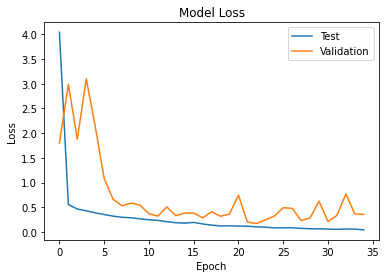

In [9]:
plt.plot(metricVals.history['loss'])
plt.plot(metricVals.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

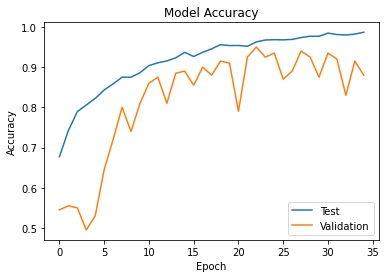

In [10]:
plt.plot(metricVals.history['accuracy'])
plt.plot(metricVals.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

In [11]:
model.save("BrainTumorClassifier.h5")

C:\Users\chand\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
cnn = load_model("BrainTumorClassifier.h5")

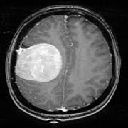

1/1 [==============================] - 1s 518ms/step
100.0 % chance of Brain Tumor.
Yes


In [13]:
# Yes 1
test = image.load_img("dataset/test/Y1.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

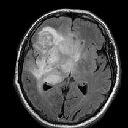

1/1 [==============================] - 0s 75ms/step
99.99991655349731 % chance of Brain Tumor.
Yes


In [14]:
# Yes 2
test = image.load_img("dataset/test/Y2.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

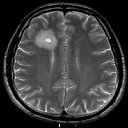

1/1 [==============================] - 0s 80ms/step
100.0 % chance of Brain Tumor.
Yes


In [15]:
# Yes 3
test = image.load_img("dataset/test/Y3.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

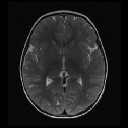

1/1 [==============================] - 0s 70ms/step
0.0004593563971866388 % chance of Brain Tumor.
No


In [16]:
# No 1
test = image.load_img("dataset/test/N1.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

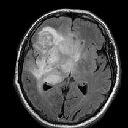

1/1 [==============================] - 0s 71ms/step
99.99991655349731 % chance of Brain Tumor.
Yes


In [21]:
# No 2
test = image.load_img("dataset/test/Y2.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

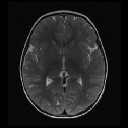

1/1 [==============================] - 0s 71ms/step
0.0004593563971866388 % chance of Brain Tumor.
No


In [22]:
# No 3
test = image.load_img("dataset/test/N1.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")